In [ ]:
import pickle

# Specify the path to your .pkl file
pkl_file_path = 'datasets\ServerMachineDataset\processed\machine-1-1_test.pkl'

# Open and read the .pkl file
with open(pkl_file_path, 'rb') as file:
    loaded_data = pickle.load(file)

In [ ]:
import pandas as pd
pd.DataFrame(loaded_data)



In [ ]:
swat = pd.read_csv('datasets\data\SWaT_Dataset_Attack_v0.csv')
swat.columns

In [ ]:

#from matplotlib import pyplot as plt
#for c in swat.columns[1:51]:
#    fig = plt.figure()
#    plt.plot(swat[c].values)
#    plt.plot(swat['Normal/Attack']=='Normal')

In [ ]:
swat = swat.drop(' Timestamp', axis=1)
labels = (swat['Normal/Attack'].values=='Attack')
values = swat.drop('Normal/Attack', axis=1).values


#from sklearn.preprocessing  import StandardScaler
#scaler = StandardScaler()
#values = scaler.fit_transform(values) 

In [ ]:
x = values[:, 6]
plt.plot(x)


In [ ]:
train_test_split=0.7

train_values = values[:int(train_test_split*len(labels)),:]
train_labels = labels[:int(train_test_split*len(labels))]

test_values = values[int(train_test_split*len(labels)):,:]
test_labels = labels[int(train_test_split*len(labels)):]

train_values[train_labels==False].shape

In [ ]:
import pickle

#dump train values into file
path = 'datasets/data/processed/SWAT_train.pkl'
with open(path, 'wb') as file:
    pickle.dump(train_values, file)



#dump test values into file
path = 'datasets/data/processed/SWAT_test.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_values, file)


#dump test labels into file
path = 'datasets/data/processed/SWAT_test_label.pkl'
with open(path, 'wb') as file:
    pickle.dump(test_labels, file)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = values[:, 6]
plt.plot(x[7170:7500])
#plt.plot(x)

In [ ]:
from scipy import stats

fft_result = np.fft.fft(x)
log_amplitude = np.log(np.abs(fft_result))
phase = np.angle(fft_result)
window_size = 20
smoothed_log_amplitude = np.convolve(log_amplitude, np.ones(window_size)/window_size, mode = 'same')
residual_log_amplitude = smoothed_log_amplitude-log_amplitude
im_unit = 1j
sr = np.abs(np.fft.ifft(np.exp(residual_log_amplitude + im_unit*phase)))
tau = 1
sr_mean = np.mean(sr)
sr_var = np.var(sr)
outliers =  ((sr-sr_mean) > tau*sr_mean)
x_replaced = x
x_replaced[outliers] = stats.mode(x)[0]

In [ ]:
np.where(outliers)
plt.figure()
#plt.plot(x_replaced[7270:7400])
#plt.plot(x[7270:7400])
plt.plot(outliers)

In [ ]:
plt.figure()
res = sr-sr_mean
plt.plot(res[7270:7400])
plt.plot(outliers[7270:7400])


In [ ]:
np.sum(outliers)

In [ ]:
import numpy as np
def spectral_residual_replace(x, tau=20, window_size=20):
    #compute fourier transform
    fft_result = np.fft.fft(x)

    #compute phase and log amplitude of fft
    log_amplitude = np.log(np.abs(fft_result)) 
    phase = np.angle(fft_result)
    
    #smooth the amplitude and compute the residual
    smoothed_log_amplitude = np.convolve(log_amplitude, np.ones(window_size)/window_size, mode = 'same')
    residual_log_amplitude = smoothed_log_amplitude-log_amplitude
    
    #compute the spectral residual
    im_unit = 1j
    sr = np.abs(np.fft.ifft(np.exp(residual_log_amplitude + im_unit*phase)))
    
    #identify outliers
    sr_mean = np.mean(sr)
    sr_var = np.var(sr)
    outliers =  ((sr-sr_mean) > tau*sr_mean)
    
    #replace outliers
    x_replaced = x
    x_replaced[outliers] = np.mean(x) 

    return x_replaced



In [ ]:
import pandas as pd
wadi = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/WADI_attackdataLABLE.csv', delimiter=',', skiprows=1 )
#skab_attack = pd.read_csv('C:/Users/g.nenna/Documents/GitHub/mtad-gat-pytorch/datasets/data/SKAB/attacks/2.csv', delimiter=';')
wadi = wadi.drop('Row ', axis=1)
wadi = wadi.drop('Date ', axis=1)
wadi = wadi.drop('Time', axis=1)
wadi = wadi.drop('2_LS_001_AL', axis=1) #nan column
wadi = wadi.drop('2_LS_002_AL', axis=1) #nan column
wadi = wadi.drop('2_P_001_STATUS', axis=1) #nan column
wadi = wadi.drop('2_P_002_STATUS', axis=1) #nan column
wadi = wadi.dropna(axis=0)

labels = (wadi['Attack LABLE (1:No Attack, -1:Attack)'].values==-1)
values = wadi.drop('Attack LABLE (1:No Attack, -1:Attack)', axis=1).values
        

In [ ]:
from sklearn.preprocessing  import StandardScaler, QuantileTransformer
from matplotlib import pyplot as plt
scaler = QuantileTransformer(output_distribution='normal')
values_scaled = scaler.fit_transform(values)
plt.plot(values[:,0])

In [ ]:
plt.plot(values_scaled[:,0])

In [ ]:
plt.plot(wadi['Row '])

np.sum(wadi['Attack LABLE (1:No Attack, -1:Attack)']==-1)/172803

In [ ]:
wadi.iloc[2,80:90]

In [ ]:
wadi['2_P_001_STATUS']

In [ ]:
import pandas as pd
skab = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/SKAB/anomaly-free.csv', delimiter=';' )

skab

In [ ]:
from matplotlib import pyplot as plt
skab_attack = pd.read_csv(
    'C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/SKAB/attacks/1.csv', 
    delimiter=';' )

plt.plot(skab_attack.iloc[:,1])


In [ ]:
plt.plot(skab.iloc[:,1])

In [ ]:
kpi = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/KPI/train.csv' )
kpi

In [ ]:
plt.plot(kpi['timestamp'])


In [ ]:
from matplotlib import pyplot as plt
X_train = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Train/X_train.txt', delimiter=' ', header=None)
X_test = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Test/X_test.txt', delimiter=' ', header=None)

X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_train = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Train/Y_train.txt', delimiter=' ', header=None)
y_test = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/ACT/Test/Y_test.txt', delimiter=' ', header=None)

Y = pd.concat([y_train, y_test], axis=0, ignore_index=True)
y_anomaly = ([x in range(7,13) for x in Y.values])
plt.figure()
plt.plot(y_train[0:1000])
plt.plot(y_anomaly[0:1000])
#plt.plot(X_train.iloc[0:1000,2])


In [ ]:
import numpy as np
np.array(y_anomaly)

In [ ]:
plt.hist(y_train)

In [ ]:
X

In [ ]:
from scipy.io import arff
import pandas as pd

# Replace 'your_file.arff' with the actual path to your ARFF file
file_path = 'C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/EEG/EEG Eye State.arff'

# Load ARFF file
data, meta = arff.loadarff(file_path)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
plt.figure()
#plt.plot(scaler.fit_transform(df.iloc[0:1000,0].values.reshape(-1,1)))
plt.plot(df.iloc[:,14].values)

In [ ]:
metro = pd.read_csv('C:/Users/giuli/Documents/mtad-gat-pytorch/datasets/data/MetroPT3.csv')

In [ ]:
metro.timestamp = pd.to_datetime(metro.timestamp)
metro.timestamp

In [ ]:
start_attack = ['2020-04-18 00:00:00', '2020-05-29 23:30:00', '2020-06-05 10:00:00', '2020-07-15 14:30:00']
end_attack = ['2020-04-18 23:59:00', '2020-05-30 06:00:00', '2020-06-07 14:30:00', '2020-07-15 19:00:00']
label = np.zeros(metro.shape[0])
for i in range(4):
    label += ((metro.timestamp>=start_attack[i] ) & (metro.timestamp<=end_attack[i])).values
label = label==1

test_mask = (metro.timestamp >= '2020-04-17 00:00:00') & (metro.timestamp <= '2020-07-16 00:00:00')
train_mask = np.logical_not(test_mask)
metro_test = metro[test_mask]
metro_train = metro[train_mask]


In [ ]:
((metro.timestamp>=start_attack[i] ) & (metro.timestamp<=end_attack[i])).values

In [ ]:
metro_test.iloc[:,2:]

## esplorazione dati iveco

In [48]:

print(work_df[work_df['chassis'].isin(anomaly_free_veichles) ].shape)
print(work_df[work_df['chassis'].isin(claimed_veichles) ].shape)

(2173, 1004)
(6832, 1004)


In [ ]:

len(unique)

In [5]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
dfs = []
path = "datasets/data/IVECO"

anomaly_free_veichles = ['ZCFCR35A005525500', 'ZCFCR35A005544595','ZCFCR35A305520050','ZCFCR35A305549323','ZCFCR35A505551221']
claimed_veichles = ['ZCFCS72A705490017','ZCFCR35A605433257','ZCFCS35AX05524066','ZCFCR35A905456015','ZCFCR35A805535577']
claim_dates = ['21/04/2023','14/07/2023','14/07/2023','22/09/2023','09/10/2023']
datetime_series = pd.to_datetime(claim_dates, format='%d/%m/%Y')

claims = pd.DataFrame({'chassis': claimed_veichles,'claim_date': datetime_series})

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path)
        df['startOfSampling'] = pd.to_datetime(df['startOfSampling'])
        df['endOfSampling'] = pd.to_datetime(df['endOfSampling'])
        df = df.sort_values(by='startOfSampling')
        dfs.append(df)

work_df = pd.concat(dfs)
work_df.reset_index(drop = True, inplace = True)


index_columns = work_df.iloc[:,:5] #tolgo colonne di servizio
work_df = work_df.iloc[:,5:]
thresh = 0.9 #threshold per determinare quanti missing value sono necessari per buttare un gruppo di parametri
reduce_pca = True #flag per ridurre i gruppi di colonne ad una sola colonna tramite pca
n_columns = len(work_df.columns)
names = [work_df.columns.str.split('_')[i][0] for i in range(n_columns)] #prima parte dei nomi delle colonne
unique = list(set(names)) #nomi dei gruppi di colonne

na_rate = []
clean_df = pd.DataFrame()

for i in range(len(unique)): #per ciascun gruppo di colonne
    group_columns = work_df.columns[work_df.columns.str.startswith(unique[i])]  #seleziono il gruppo di parametri che ha lo stesso nome iniziale
    group_df = work_df[group_columns] #seleziono la porzione di df relativa a quel gruppo di parametri
    rate = np.array(group_df.isna()).sum()/ (group_df.shape[0]* group_df.shape[1]) # calcolo quanti dati mancanti ci sono per quella porzione di dataframe
    na_rate.append(rate)
    if rate > thresh: #se ho troppi dati mancanti
        continue #escludo il gruppo di colonne

    cov = np.nan_to_num(group_df.cov().values) #calcolo la covarianza di ciascuna colonna
    dist = (cov - np.zeros(cov.shape)).sum() #calcolo la distanza dalla matrice nulla
    if dist < 0.01:#se la covarianza del gruppo di colonne è nulla allora le colonne sono costanti 
        continue #escludo il gruppo di colonne

    for col in group_df.columns: #per ciascuna colonna del gruppo di parametri
        if sum(group_df[col].isna())/group_df.shape[0]>thresh: #se in quella colonna ci sono troppi dati mancanti
          group_df = group_df.drop(col, axis = 1)# droppo la colonna
    # la pulizia delle colonne serve per non creare problemi con la pca (se ci sono troppi nan non ha senso performare pca su quella colonna)  

    if group_df.shape[1] > 1 and reduce_pca: #se scelgo di ridurre il gruppo di colonne a una sola colonna
        medians = group_df.median() #calcolo le mediane di ciascuna colonna
        group_df = group_df.fillna(medians) #pulizia dei nan con la mediana per colonne
        scaler = StandardScaler()
        group_df_scaled = scaler.fit_transform(group_df) #standardizzazione colonne
        pca = PCA(n_components=1)
        pc = pca.fit_transform(group_df_scaled) #calcolo pca con una sola componente principale
        group_df = pd.DataFrame(pc, columns=[unique[i]]) 


    clean_df = pd.concat([clean_df, group_df], axis=1)

clean_df = pd.concat([index_columns, clean_df], axis = 1)
n_columns = len(clean_df.columns)
names = [clean_df.columns.str.split('_')[i][0] for i in range(n_columns)] 
unique = list(set(names))

In [6]:
clean_df

,SessionId,chassis,startOfSampling,endOfSampling,LastSession,EngineExhaustTemperatureMin_v01,SpeedProfileTime,IntakeManifoldPressureMax_v01,EngineSpeedProfileTime,BatteryChargerConditionTime_v01_7_8,...,EngineFuelTemperatureMax_v01,VehicleSpeedAvg,ExtTempMax_v01,BarometricPressureAvg_v01,GasRailPressureTime,SessionDistance_v02,EngineCoolantTemperatureTime,RoadSlopeDistance,OdoValueAtEnd_v02,EngineInAirPressureAvg_v01
0,9596ebcb-f59b-40c8-9f47-5f08e49cf5db,ZCFCR35A005544595,2023-08-24 08:51:13+00:00,2023-08-24 09:05:23+00:00,True,NaN,-1.056605,NaN,-1.675291,648000.0,...,62,0.411984,27,100,1.413464,20,-1.408751,-1.492082,49680,NaN
1,e249a436-f9b4-444e-9f3f-ac100a0e9a20,ZCFCR35A305520050,2023-09-01 02:42:36+00:00,2023-09-01 02:57:36+00:00,False,NaN,4.989493,NaN,1.366198,704000.0,...,45,-1.432984,18,100,3.467341,16410,-1.534769,3.390280,37150010,NaN
2,90e2bc05-dea9-49f7-9edc-b218b983947a,ZCFCR35A305520050,2023-09-01 02:57:36+00:00,2023-09-01 03:12:36+00:00,False,NaN,3.896828,NaN,1.943174,703000.0,...,45,-2.106543,18,100,1.980852,23590,-2.226712,5.120925,37173650,NaN
3,0b3e446d-4928-4bc6-8edb-6d464a7466d2,ZCFCR35A305520050,2023-09-01 03:12:37+00:00,2023-09-01 03:27:37+00:00,False,NaN,1.135366,NaN,1.537823,707000.0,...,45,-2.194399,17,100,1.897306,24260,-2.825307,5.778177,37197910,NaN
4,c5255160-9178-43fb-a43e-fc7067eeafea,ZCFCR35A305520050,2023-09-01 03:27:37+00:00,2023-09-01 03:42:37+00:00,False,NaN,0.837419,NaN,2.063445,710000.0,...,44,-1.062501,17,100,2.210814,24405,-2.818158,5.749617,37222315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,326872a4-23fe-4753-a37d-fcc88c18444e,ZCFCR35A905456015,2023-09-22 07:31:17+00:00,2023-09-22 07:38:26+00:00,True,NaN,-0.496208,NaN,-1.111826,340000.0,...,53,-1.374413,15,94,-0.201437,3255,-0.417899,-0.749627,3660265,NaN
9001,3758c01e-1a1c-4bd7-882d-50ac9a0320e7,ZCFCR35A905456015,2023-09-22 07:52:08+00:00,2023-09-22 07:52:23+00:00,True,280.0,0.008923,92.0,-0.587123,13000.0,...,75,-0.173720,15,94,-0.579223,0,0.290456,-1.257047,3660265,92.0
9002,f87b0aaa-29c1-4cb6-ba2b-c1832ee5978e,ZCFCR35A905456015,2023-09-25 15:29:08+00:00,2023-09-25 15:30:29+00:00,True,NaN,-0.094659,NaN,-0.708052,58000.0,...,39,-0.173720,33,94,-0.421971,10,-0.060457,-1.450326,3660400,NaN
9003,a18f17a1-9e86-4f25-8aab-3fc350691774,ZCFCR35A905456015,2023-09-26 06:55:57+00:00,2023-09-26 06:59:05+00:00,True,NaN,-0.040501,NaN,-0.828708,140000.0,...,30,0.411984,15,94,-0.156607,35,-0.060457,-1.589164,3660435,NaN


0.5007279906224936

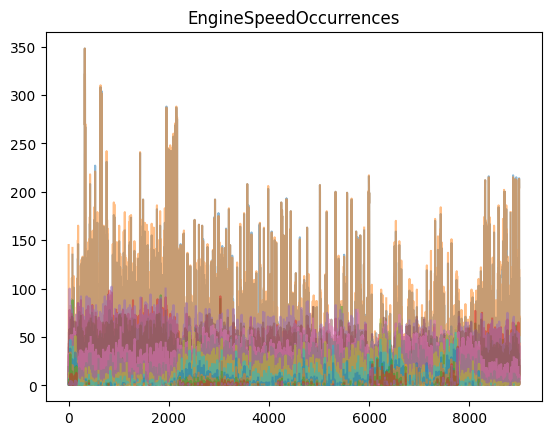

In [177]:
k = 24
group_columns = clean_df.columns[clean_df.columns.str.startswith(unique[k])]
group_df = clean_df[group_columns]
rate = np.array(group_df.isna()).sum()/ (group_df.shape[0]* group_df.shape[1])
for i in range(group_df.shape[1]):
    plt.plot(group_df.iloc[:,i], alpha = 0.5)
    plt.title(unique[k])
rate



In [178]:
group_df.shape

(9005, 18)

In [37]:
from matplotlib import pyplot as plt
import numpy as np
column_group = work_df.columns[work_df.columns.str.startswith(unique[9])]
group_df = work_df[column_group]
na_rate = np.array(group_df.isna()).sum()/ (group_df.shape[0]* group_df.shape[1])

1.0

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a datetime column named 'datetime_column'
# and you want to filter rows after a specific datetime, let's say '2022-01-01 12:00:00'

# Sample DataFrame creation (you may already have a DataFrame)
data = {'datetime_column': ['2022-01-01 10:00:00', '2022-01-01 12:30:00', '2022-01-02 08:45:00']}
df = pd.DataFrame(data)
df['datetime_column'] = pd.to_datetime(df['datetime_column'], utc = True)

# Specify the datetime threshold for filtering
threshold_datetime = pd.to_datetime('2022-01-01 12:00:00', utc=True)

# Filter rows based on the datetime_column
filtered_df = df[df['datetime_column'] > threshold_datetime]

# Display the filtered DataFrame
print(filtered_df)

In [ ]:
work_df[['chassis','startOfSampling', 'endOfSampling']].iloc[50:60, :]

In [ ]:
pd.to_datetime(work_df['endOfSampling'])

In [ ]:
from matplotlib import pyplot as plt

plt.plot(df.iloc[:,9])

In [ ]:
work_df = work_df.iloc[:,5:] #esclusione colonne iniziali

In [ ]:
na = []
for i in range(len(work_df.columns)):
    na.append(sum(work_df.iloc[:,i].isna()))

fig = plt.hist(na, bins=100)
#istogramma (x = quantità di dati mancanti  y = numero di colonne)

In [ ]:
# cancellazione colonne che hanno i nan sopra una certa soglia
import numpy as np
thresh = 0.75

where = (np.array(na) < work_df.shape[0]*thresh)

work_df = work_df.iloc[:, where]
work_df.shape

In [ ]:
work_df.shape[0]*thresh

In [ ]:
#replace nan rimanenti con la mediana
work_df = work_df.fillna(work_df.median())

In [ ]:
#provare a normalizzare per visualizzazione
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
work_df_scaled = scaler.fit_transform(np.array(work_df))

In [ ]:
fig = plt.figure(figsize=(30, 8))

for i in range(10):
    plt.plot(work_df_scaled[:,i], alpha = 0.5, linewidth=0.5)

In [ ]:
import numpy as np
a =np.full(10, False, dtype=bool)
a

In [1]:
import zipfile

def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
        

iveco_tva_all = 'datasets/data/IVECO_TVA.zip'
path_to_extract = 'datasets/data/IVECO_TVA'

unzip_file(iveco_tva_all, path_to_extract)

In [3]:
import os
for file in os.listdir('datasets/data/IVECO_TVA'):
    unzip_file('datasets/data/IVECO_TVA/'+file, 'datasets/data/IVECO_TVA/'+file.replace('.zip', ''))

#DELETE ZIPPED FILES

In [14]:
import pandas as pd
import os


dfs = []
for file in os.listdir('datasets/data/IVECO_TVA'):
    dfs.append(pd.read_csv('datasets/data/IVECO_TVA/'+file+'/'+file+'.csv'))

In [13]:
veicoli_sani = [
    'WJMEG2RP00C488309',
    'WJMMG2AT60C481711',
    'WJMEG2RPX0C487877',
    'WJMMG2AT50C470652',
    'WJMMG2AT20C483648'
    ]

veicoli_tva = {
    'chassis': [
        'WJMMG2AT70C471317',
        'WJMAG2AP90C470983',
        'WJMAG2AP20C470842',
        'WJMMG2AT40C478760',
        'WJMMG2AT50C475656',
        'WJMMG2AT50C476337' 
        ],
    'substitution_date': [
        '04/09/2023',
        '22/08/2023',
        '07/03/2023',
        '24/02/2023',
        '23/01/2023',
        '27/01/2023'
        ],
    'trouble_found' : [True, True, True, False, False, False],
    'reason':['dentino rotto', 'dentino rotto', 'valve stuck', None, None, None ]}
veicoli_tva = pd.DataFrame(veicoli_tva)
veicoli_tva.substitution_date = pd.to_datetime(veicoli_tva.substitution_date, format='%d/%m/%Y')
veicoli_tva

,chassis,substitution_date,trouble_found,reason
0,WJMMG2AT70C471317,2023-09-04,True,dentino rotto
1,WJMAG2AP90C470983,2023-08-22,True,dentino rotto
2,WJMAG2AP20C470842,2023-03-07,True,valve stuck
3,WJMMG2AT40C478760,2023-02-24,False,None
4,WJMMG2AT50C475656,2023-01-23,False,None
5,WJMMG2AT50C476337,2023-01-27,False,None


In [15]:
dfs[0].head(5)

,vin,datetime,timestamp,absoluteTime,ActEngPcTrq,ActEngPcTrqFract,AdvBase,AirFuelRatioOngoingCor,AirPrs,AirReq,...,TcoVehSpeed,ThrotRefPerc,TotVehDistHr,TransmCurGear,zsCrankCasePres,zsPCpf,zsTuTwc,year,month,day
0,WJMAG2AP20C470842,07-Feb-2023 00:16:09,18407.0969,0,0.0,0.000,NaN,1.00000,1.04,20.0,...,0.0,16.0,18518585.0,0.0,NaN,NaN,NaN,2023,2,8
1,WJMAG2AP20C470842,07-Feb-2023 00:16:10,18407.0970,1,0.0,0.000,-20.0,1.00000,0.99,20.0,...,0.0,15.0,18518585.0,0.0,NaN,NaN,NaN,2023,2,8
2,WJMAG2AP20C470842,07-Feb-2023 00:16:11,18407.0971,2,0.0,0.000,-20.0,1.00000,1.04,120.0,...,0.0,32.0,18518585.0,0.0,NaN,NaN,NaN,2023,2,8
3,WJMAG2AP20C470842,07-Feb-2023 00:16:12,18407.0972,3,0.0,0.000,-12.0,1.00000,0.94,235.0,...,0.0,39.0,18518585.0,0.0,NaN,NaN,NaN,2023,2,8
4,WJMAG2AP20C470842,07-Feb-2023 00:16:13,18407.0973,4,14.0,0.375,-11.0,0.96875,0.37,80.0,...,0.0,16.0,18518585.0,0.0,NaN,NaN,NaN,2023,2,8


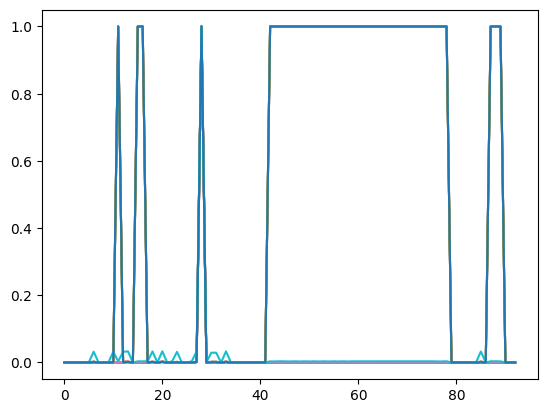

In [16]:
from matplotlib import pyplot as plt
for df in dfs:    
    na_rate = []
    for col in df.columns:
        na_rate.append(sum(df[col].isna())/df.shape[0])

    plt.plot(na_rate)



In [24]:
import numpy as np
df = dfs[7]
df.columns[np.array(na_rate) > 0.99]

Index(['asQacMapSD', 'csExhaustVFlow', 'dsWGTDuty', 'EngRefTrq',
       'osLsfSensSigmaCnt', 'osLsfSensSigmaTwcEffMon',
       'osLsfSensSigmaTwcEffMonErrSt', 'osLsfSensSigmaTwcEffMonFaultCk',
       'osMisfCoilCyl1Tmp1000', 'osMisfCoilCyl1Tmp200',
       'osMisfCoilCyl2Tmp1000', 'osMisfCoilCyl2Tmp200',
       'osMisfCoilCyl3Tmp1000', 'osMisfCoilCyl3Tmp200',
       'osMisfCoilCyl4Tmp1000', 'osMisfCoilCyl4Tmp200',
       'osMisfCoilCyl5Tmp1000', 'osMisfCoilCyl5Tmp200',
       'osMisfCoilCyl6Tmp1000', 'osMisfCoilCyl6Tmp200', 'osMisfCoilTotTmp1000',
       'osMisfCoilTotTmp200', 'osMisfInjCyl1Tmp1000', 'osMisfInjCyl1Tmp200',
       'osMisfInjCyl2Tmp1000', 'osMisfInjCyl2Tmp200', 'osMisfInjCyl3Tmp1000',
       'osMisfInjCyl3Tmp200', 'osMisfInjCyl4Tmp1000', 'osMisfInjCyl4Tmp200',
       'osMisfInjCyl5Tmp1000', 'osMisfInjCyl5Tmp200', 'osMisfInjCyl6Tmp1000',
       'osMisfInjCyl6Tmp200', 'osMisfInjTotTmp1000', 'osMisfInjTotTmp200',
       'osMSFRD_CYL_THR1000', 'osMSFRD_CYL_THR200', 'osMsfrdSe